<h1 style="color:red; font-family:candara; font-size:400%; text-align:center;"> 
    COVID-19
</h1>

***


This notebook will study my own questions about the coronavirus phenomenon that has alarmed the world and that has waken us up about the implication of pandemias in a globalised world. 
[In this link](https://systems.jhu.edu/research/public-health/ncov/) you can find a nice review of how these events have developed since its first appearance.

I think (and hope) that the world won't devolve into xenofobic, rigidly separate countries with hard borders, hence after this analysis, the most important message to take home is that nations should act more tightly and in a synchronised manner when the next pandemia rises.

Whilst looking at the great map done by the [John Hopkins University](https://systems.jhu.edu/research/public-health/ncov/), I was left with so many more questions than answers about many details of this illness and how it is affecting each country. 
Hopefully some indagation could help understand better the spread and the impact of this disease.

The data used here was taken from the [John Hopkins University data on GitHub](https://github.com/CSSEGISandData/COVID-19/tree/master/archived_data), which in turn is compiled from different sources. This database is updated once a day.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt

In [2]:
urlconfirmed = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv'
urldeaths = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv'
urlrecovered = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv'

df = pd.read_csv(urlconfirmed, error_bad_lines=False)
deaths = pd.read_csv(urldeaths, error_bad_lines=False)
recov = pd.read_csv(urlrecovered, error_bad_lines=False)

In [3]:
df = df.rename(columns={'Province/State':'provincestate', 'Country/Region':'countryregion', 'Lat':'lat', 'Long':'lon'}) #
recov = recov.rename(columns={'Province/State':'provincestate', 'Country/Region':'countryregion', 'Lat':'lat', 'Long':'lon'}) #
deaths = deaths.rename(columns={'Province/State':'provincestate', 'Country/Region':'countryregion', 'Lat':'lat', 'Long':'lon'}) #

latlon = df[['countryregion', 'lat', 'lon']] # We have to save lat and long 

# I am not interested in regions of the US. which seems to be the only one with meaningful province/state
df = df.groupby('countryregion', as_index=False).sum()
recov = recov.groupby('countryregion', as_index=False).sum()
deaths = deaths.groupby('countryregion', as_index=False).sum()


C:\Users\cuspi\Anaconda3\lib\site-packages\pandas\plotting\_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


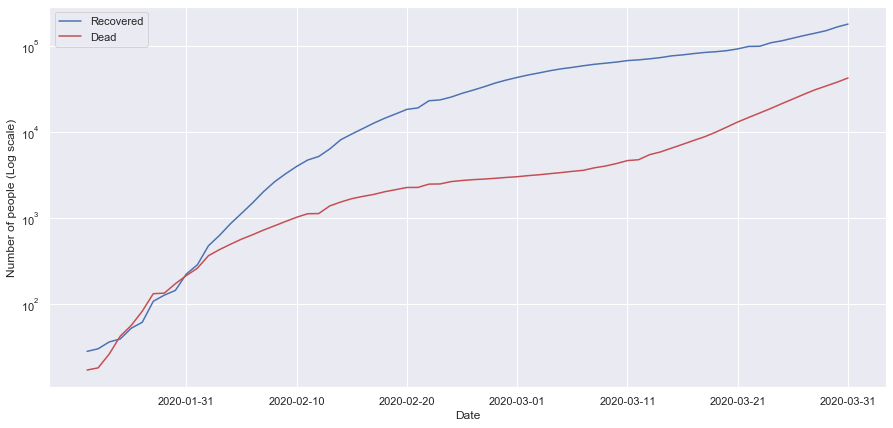

In [4]:
dates_death = pd.to_datetime( df.columns[3:])
dates_recov = pd.to_datetime( recov.columns[3:])

fig = plt.figure(figsize=(15,7))
sns.lineplot(x=dates_recov, y= recov.sum()[3:].astype(float), label='Recovered' );
sns.lineplot(x=dates_death, y=deaths.sum()[3:].astype(float), color='r' , label='Dead');
plt.yscale('log')

plt.ylabel('Number of people (Log scale)')
plt.xlabel('Date')

#Show some ticks
x_ticks = df.columns[:3:-10].tolist()
x_ticks
plt.xticks(x_ticks);

Currently there is some tendency to compare the number of people who died with the number of people who currently have the disease but this is nonsense. Comparing these groups would be like comparing the number of people who didn't win the lottery last month with the number of people who bought a ticket this month.

To know the real current risk of death we *must* compare the number of people who **already went through the illness** and *survived* with the number of people who *died* from the disease.

First let's get the total number of people who have had the illness:

In [5]:
recov.columns

Index(['countryregion', 'lat', 'lon', '1/22/20', '1/23/20', '1/24/20',
       '1/25/20', '1/26/20', '1/27/20', '1/28/20', '1/29/20', '1/30/20',
       '1/31/20', '2/1/20', '2/2/20', '2/3/20', '2/4/20', '2/5/20', '2/6/20',
       '2/7/20', '2/8/20', '2/9/20', '2/10/20', '2/11/20', '2/12/20',
       '2/13/20', '2/14/20', '2/15/20', '2/16/20', '2/17/20', '2/18/20',
       '2/19/20', '2/20/20', '2/21/20', '2/22/20', '2/23/20', '2/24/20',
       '2/25/20', '2/26/20', '2/27/20', '2/28/20', '2/29/20', '3/1/20',
       '3/2/20', '3/3/20', '3/4/20', '3/5/20', '3/6/20', '3/7/20', '3/8/20',
       '3/9/20', '3/10/20', '3/11/20', '3/12/20', '3/13/20', '3/14/20',
       '3/15/20', '3/16/20', '3/17/20', '3/18/20', '3/19/20', '3/20/20',
       '3/21/20', '3/22/20', '3/23/20', '3/24/20', '3/25/20', '3/26/20',
       '3/27/20', '3/28/20', '3/29/20', '3/30/20', '3/31/20'],
      dtype='object')



 The current death percentage worlwide is 19.13% 


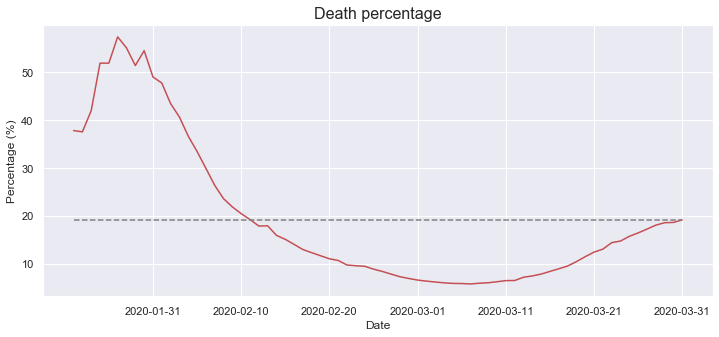

In [6]:
if  dates_death[-1]  > dates_recov[-1]:
    dates = dates_recov
else:
    dates = dates_death

done = deaths.sum()[3:(len(dates)+3)] + recov.sum()[3:(len(dates)+3)]
# sns.lineplot(x=dates, y=done.astype(float));

fig = plt.figure(figsize=(12,5))
death_percentages = 100 *(deaths.sum()[3:(len(dates)+3)].astype(float)/done.astype(float) )

print('\n\n The current death percentage worlwide is {:.2f}% '.format(death_percentages[-1]) )

sns.lineplot(x=dates, y=death_percentages[:len(dates)] , color='r')
plt.plot([dates[0], dates[-1] ],[death_percentages[-1], death_percentages[-1] ],  color='grey', linestyle='--')

plt.xlabel('Date')
plt.ylabel('Percentage (%)')
plt.title('Death percentage', size=16)
#Show some ticks
x_ticks = df.columns[:3:-10].tolist()
x_ticks
plt.xticks(x_ticks);

This plot makes sense. At the beginning the percentage was so high because the first cases reported were the ones were people died. Later on, many tests were taken (thus raising the number of people to have had the disease and survived) and people were being treated properly. We might say that at the beginning this curve is not that helpful but later on, specially towards the end of the plot, this is a good measure of how many people diagnosed with the illness survives.  

I think this figure is one of the most important things to be considering these days: It tells us that when someone is diagnosed with COVID-19, the outcome seems dreadful. In some countries the outcome is almost a flip coin.
Notice how this percentage is completely different to that usually reported by the media! In many sources the number of dead people is usually compared to the **active cases**. That percentage sometimes **is being compared to that of flu!**

It is **alarming** that towards present day this plot has a tendency to increase.

###  What about the weekends?

Take into account that the last day these number numbers were refreshed was on a: 1


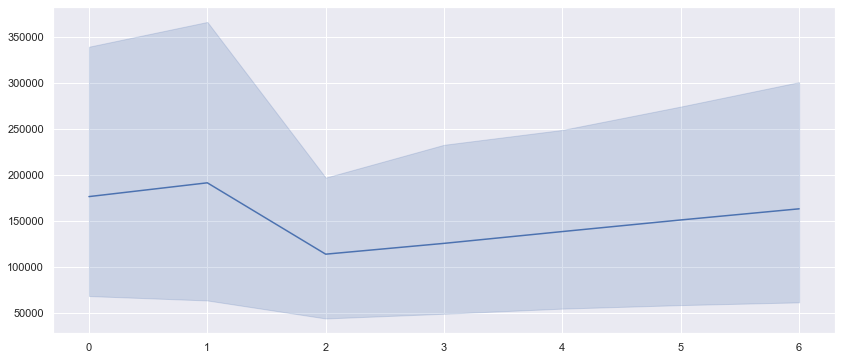

In [7]:
dayofweek = [ pd.Timestamp(i).dayofweek for i in df.columns[3:]]
len(dayofweek)
print('Take into account that the last day these number numbers were refreshed was on a: {}'.format(dayofweek[-1]))

fig = plt.figure(figsize=(14,6))
sns.lineplot(x=dayofweek, y=df.sum()[3:].astype(float)  );

As expected, we can see that over the weekends there are less cases reported. However, the difference is quite small with a comparatively large uncertain error interval.

## To make analyses by country

In [8]:
#To search 
df[df.countryregion.str.contains('United King')]

,countryregion,lat,lon,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,...,3/22/20,3/23/20,3/24/20,3/25/20,3/26/20,3/27/20,3/28/20,3/29/20,3/30/20,3/31/20
172,United Kingdom,321.8262,-423.4011,0,0,0,0,0,0,0,...,5745,6726,8164,9640,11812,14745,17312,19780,22453,25481


In [9]:
def plot_dvsr(country, scale='log'):
    '''This functions gives back a plot of the death and recovered people of a specific country'''

    fig = plt.figure(figsize=(14,7))
    sns.lineplot(x=dates, y= recov[recov.countryregion==country].sum()[3:(len(dates)+3)].astype(float), label='Recovered' );
    sns.lineplot(x=dates, y=deaths[deaths.countryregion==country].sum()[3:(len(dates)+3)].astype(float), color='r' , label='Dead');
    plt.yscale(scale)

    plt.ylabel('Number of people (Log scale)')
    plt.xlabel('Date')
    plt.title('{}'.format(country), size=16)
    
    #Show some ticks
    x_ticks = df.columns[:3:-10].tolist()
    x_ticks
    plt.xticks(x_ticks);

We now make a list of the countries we are interested in:

In [10]:
countries = ['Italy','Mexico', 'Canada', 'Netherlands', 'Germany', 'United Kingdom', 'China', 'Japan', 'US', 'Indonesia', 'Spain']

# Interactive imports:
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

In [11]:
interact(plot_dvsr , country=countries, scale=['log','linear'] );

interactive(children=(Dropdown(description='country', options=('Italy', 'Mexico', 'Canada', 'Netherlands', 'Ge…

Japan seems to be the country that responded the best all along.